From Craig Lage's notebook collection

In [2]:
import numpy as np
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as pf
from astropy.time import Time, TimeDelta
from lsst_efd_client import EfdClient
from lsst.sitcom.vandv.efd import create_efd_client

In [3]:
client = create_efd_client()

In [4]:
def  readRubinTV_json(date, camera):
    year = int(date/10000)
    month = int((date - 10000 * year)/100)
    day = int((date - 10000 * year - 100 * month))
    if camera == 'Wide':
        filename = f'/scratch/cslage/starTracker/startracker-wide_{year}-{month:02}-{day:02}.json'
    elif camera == 'Narrow':
        filename = f'/scratch/cslage/starTracker/startracker_{year}-{month:02}-{day:02}.json'
    elif camera == 'AuxTel':
        filename = f'/scratch/cslage/starTracker/auxtel_{year}-{month:02}-{day:02}.json'
    df = pd.read_json(filename)
    df = df.transpose()
    print(filename)
    return df

## Checking the tpoint input data
### One camera, one date only

/scratch/cslage/starTracker/startracker_2023-03-07.json


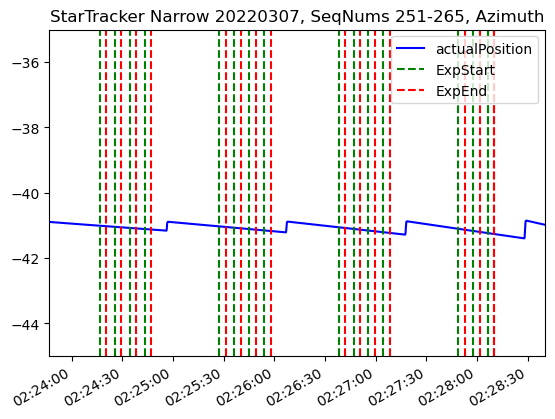

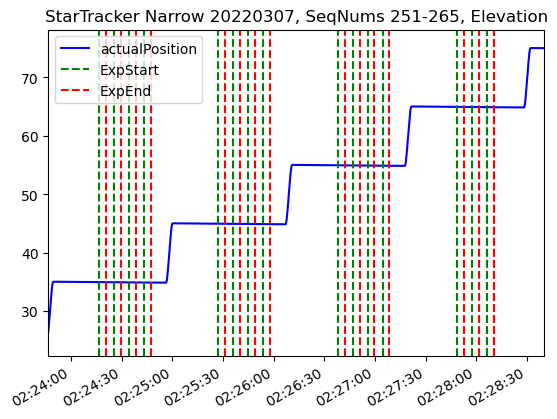

In [6]:
[camera, num] = ['Narrow', 102]
date = 20230307
year = int(date/10000)
month = int((date - 10000 * year)/100)
day = int((date - 10000 * year - 100 * month))
df = readRubinTV_json(date, camera)
df = df[~df.isnull().any(axis=1)]

exp1 = 251
exp2 = 265

start_time = Time(df.loc[249]['MJD'], format='mjd', scale='tai')
end_time = Time(df.loc[294]['MJD'], format='mjd', scale='tai')
azMTM = await client.select_time_series('lsst.sal.MTMount.azimuth', \
                                ['actualPosition'],  start_time.utc, end_time.utc)
elMTM = await client.select_time_series('lsst.sal.MTMount.elevation', \
                                ['actualPosition'],  start_time.utc, end_time.utc) 
#fig = plt.figure(figsize=(16,4))
ax1 = azMTM.plot(color='blue')
ax1.set_title(f"StarTracker Narrow 20220307, SeqNums {exp1}-{exp2}, Azimuth")
ax2 = elMTM.plot(color='blue')
ax2.set_title(f"StarTracker Narrow 20220307, SeqNums {exp1}-{exp2}, Elevation")
row1 = df.loc[exp1]
time1 = Time(row1['MJD'], format='mjd', scale='tai')
expTime1 = row1['Exposure Time']
start_plot = time1 - TimeDelta(expTime1/2.0, format='sec') - TimeDelta(30.0, format='sec')
row2 = df.loc[exp2]
time2 = Time(row2['MJD'], format='mjd', scale='tai')
expTime2 = row2['Exposure Time']
end_plot = time2 + TimeDelta(expTime2/2.0, format='sec') + TimeDelta(30.0, format='sec')
ax1.set_xlim(start_plot.utc.isot, end_plot.utc.isot)

ax1.set_ylim(-45.0, -35.0)
ax2.set_xlim(start_plot.utc.isot, end_plot.utc.isot)
for seqNum in df.index.values.tolist():
    if seqNum < exp1 or seqNum > exp2:
        continue
    row = df.loc[seqNum]
    time = Time(row['MJD'], format='mjd', scale='tai')
    expTime = row['Exposure Time']
    start_exp = time - TimeDelta(expTime/2.0, format='sec')
    end_exp = time + TimeDelta(expTime/2.0, format='sec')
    #print(seqNum, start_exp.isot, end_exp.isot)
    ax1.axvline(start_exp.utc.isot, color='green', linestyle='--')
    ax1.axvline(end_exp.utc.isot, color='red', linestyle='--')
    ax2.axvline(start_exp.utc.isot, color='green', linestyle='--')
    ax2.axvline(end_exp.utc.isot, color='red', linestyle='--')
ax1.axvline(start_exp.utc.isot, color='green', linestyle='--', label='ExpStart')
ax1.axvline(end_exp.utc.isot, color='red', linestyle='--', label='ExpEnd')
ax2.axvline(start_exp.utc.isot, color='green', linestyle='--', label='ExpStart')
ax2.axvline(end_exp.utc.isot, color='red', linestyle='--', label='ExpEnd')
ax1.legend()
ax2.legend()


/scratch/cslage/starTracker/startracker_2023-03-07.json
Start_Exp = 2023-03-08T02:25:27.253, End_exp = 2023-03-08T02:25:31.253


Text(2023-03-08T02:25:27.453, 30.0, 'Using the average value between \nthe read and green lines')

<Figure size 1600x400 with 0 Axes>

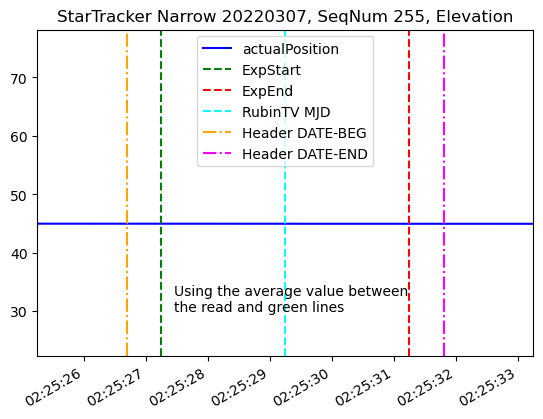

In [7]:
[camera, num] = ['Narrow', 102]
date = 20230307
year = int(date/10000)
month = int((date - 10000 * year)/100)
day = int((date - 10000 * year - 100 * month))
df = readRubinTV_json(date, camera)
df = df[~df.isnull().any(axis=1)]
exp1 = 255
path = f"/project/GenericCamera/{num}/{year}/{month:02}/{day:02}/"
filename = path + f"GC{num}_O_{date}_{exp1:06}.fits"
hdulist = pf.open(filename)
header = hdulist[0].header
dateBeg = Time(header['DATE-BEG'], scale='tai')
dateEnd = Time(header['DATE-END'], scale='tai')

start_time = Time(df.loc[249]['MJD'], format='mjd', scale='tai')
end_time = Time(df.loc[294]['MJD'], format='mjd', scale='tai')
azMTM = await client.select_time_series('lsst.sal.MTMount.azimuth', \
                                ['actualPosition'],  start_time.utc, end_time.utc)
elMTM = await client.select_time_series('lsst.sal.MTMount.elevation', \
                                ['actualPosition'],  start_time.utc, end_time.utc) 
fig = plt.figure(figsize=(16,4))
ax1 = elMTM.plot(color='blue')
ax1.set_title(f"StarTracker Narrow 20220307, SeqNum {exp1}, Elevation")

row = df.loc[exp1]
time = Time(row['MJD'], format='mjd', scale='tai')
expTime = row['Exposure Time']
start_exp = time - TimeDelta(expTime/2.0, format='sec')
end_exp = time + TimeDelta(expTime/2.0, format='sec')
print(f"Start_Exp = {start_exp.utc.isot}, End_exp = {end_exp.utc.isot}")
start_plot = time - TimeDelta(expTime/2.0, format='sec') - TimeDelta(2.0, format='sec')
end_plot = time + TimeDelta(expTime/2.0, format='sec') + TimeDelta(2.0, format='sec')
ax1.set_xlim(start_plot.utc.isot, end_plot.utc.isot)
ax1.axvline(start_exp.utc.isot, color='green', linestyle='--', label='ExpStart')
ax1.axvline(end_exp.utc.isot, color='red', linestyle='--', label='ExpEnd')

ax1.axvline(time.utc.isot, color='cyan', linestyle='--', label='RubinTV MJD')
ax1.axvline(dateBeg.utc.isot, color='orange', linestyle='-.', label='Header DATE-BEG')
ax1.axvline(dateEnd.utc.isot, color='magenta', linestyle='-.', label='Header DATE-END')
ax1.legend()
ax1.text((start_exp+TimeDelta(0.2, format='sec')).utc.isot, 30.0, "Using the average value between \nthe read and green lines", color="black")


In [8]:
print((dateEnd.jd-dateBeg.jd)*86400.0, expTime)

5.126988887786865 4


In [9]:
df.columns

Index(['Exposure Time', 'MJD', 'Ra', 'Dec', 'Alt', 'Az', 'UTC',
       'Exposure Time wide', 'MJD wide', 'Ra wide', 'Dec wide', 'Alt wide',
       'Az wide', 'UTC wide', 'nSources', 'nSources filtered', 'nSources wide',
       'nSources filtered wide', 'Calculated Ra', 'Calculated Dec',
       'Calculated Alt', 'Calculated Az', 'Delta Ra Arcsec',
       'Delta Dec Arcsec', 'Delta Alt Arcsec', 'Delta Az Arcsec',
       'Delta Rot Arcsec', 'RMS scatter arcsec', 'RMS scatter pixels',
       'Calculated Ra wide', 'Calculated Dec wide', 'Calculated Alt wide',
       'Calculated Az wide', 'Delta Ra Arcsec wide', 'Delta Dec Arcsec wide',
       'Delta Alt Arcsec wide', 'Delta Az Arcsec wide',
       'Delta Rot Arcsec wide', 'RMS scatter arcsec wide',
       'RMS scatter pixels wide'],
      dtype='object')

(array([  7., 103., 230., 218., 314.,  64.,  11.,   3.,   3.,   2.]),
 array([0.01446333, 0.33229995, 0.65013658, 0.9679732 , 1.28580983,
        1.60364645, 1.92148307, 2.2393197 , 2.55715632, 2.87499295,
        3.19282957]),
 <BarContainer object of 10 artists>)

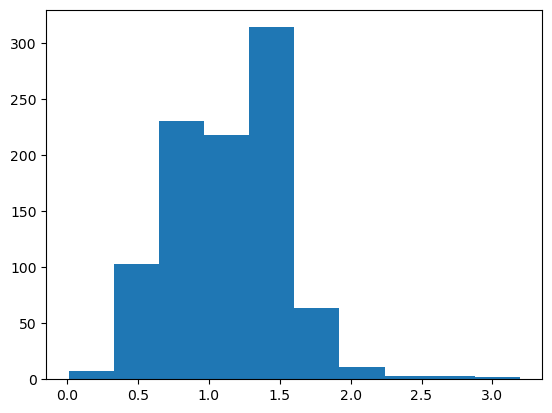

In [10]:
plt.hist(df['RMS scatter arcsec'].values)